In [1]:
!pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 169kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.18MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 14.4MB/s]


Using device: cuda
Starting training...
Epoch [1/5], Step [100/938], Loss: 1.9098
Epoch [1/5], Step [200/938], Loss: 1.4863
Epoch [1/5], Step [300/938], Loss: 1.2672
Epoch [1/5], Step [400/938], Loss: 1.2052
Epoch [1/5], Step [500/938], Loss: 1.1592
Epoch [1/5], Step [600/938], Loss: 1.1160
Epoch [1/5], Step [700/938], Loss: 1.0650
Epoch [1/5], Step [800/938], Loss: 1.0128
Epoch [1/5], Step [900/938], Loss: 1.0171
Epoch [2/5], Step [100/938], Loss: 0.9542
Epoch [2/5], Step [200/938], Loss: 0.9330
Epoch [2/5], Step [300/938], Loss: 0.9240
Epoch [2/5], Step [400/938], Loss: 0.8952
Epoch [2/5], Step [500/938], Loss: 0.8793
Epoch [2/5], Step [600/938], Loss: 0.8442
Epoch [2/5], Step [700/938], Loss: 0.8509
Epoch [2/5], Step [800/938], Loss: 0.8410
Epoch [2/5], Step [900/938], Loss: 0.8081
Epoch [3/5], Step [100/938], Loss: 0.7895
Epoch [3/5], Step [200/938], Loss: 0.7779
Epoch [3/5], Step [300/938], Loss: 0.7772
Epoch [3/5], Step [400/938], Loss: 0.7651
Epoch [3/5], Step [500/938], Loss: 0

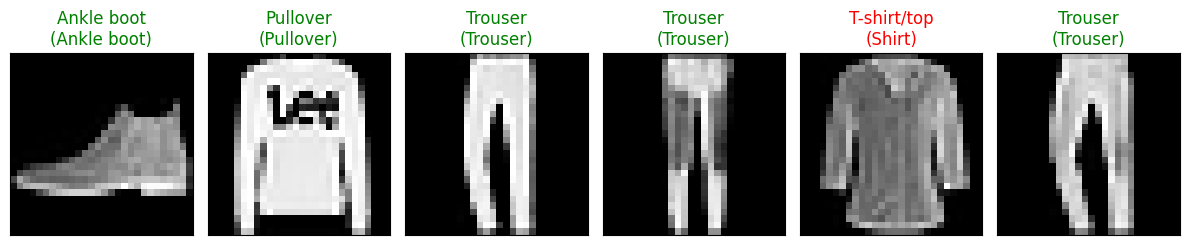

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

#load and preprocess data
transform= transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])


#sets and loaders
train_dataset= datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
t_loader= DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

#categoriessss
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#patch embedding layer definition
class PatchEmbedding(nn.Module):
    def __init__(self, img_size=28, patch_size=4, in_channels=1, embed_dim=256):
        super().__init__()

        self.img_size = img_size

        self.patch_size = patch_size

        self.n_patches = (img_size // patch_size)**2

        self.proj = nn.Conv2d(
            in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        #x shape = [b_ssize, in_chan, i_size, i_size]
        x = self.proj(x)
        x= x.flatten(2)
        x= x.transpose(1,2)
        #final shape = [b_ssize, n_patch, embed_dm]
        return x

#vision transformer
class VisionTransformer(nn.Module):
    def __init__(
        self, img_size=28, patch_size=4, in_channels=1, n_classes=10,
        embed_dim=256, depth=4, n_heads=8, mlp_ratio=4.0,  dropout=0.1,
    ):
        super().__init__()
        self.patch_embed = PatchEmbedding(
            img_size=img_size,
            patch_size=patch_size,
            in_channels=in_channels,
            embed_dim=embed_dim,
        )

        n_patches = self.patch_embed.n_patches

        #class  token
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))

        #pos embedding
        self.pos_embed = nn.Parameter(torch.zeros(1, n_patches + 1, embed_dim))

        #transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=n_heads,
            dim_feedforward=int(embed_dim * mlp_ratio),
            dropout=dropout,
            activation='gelu',
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=depth)

        # layer norm
        self.norm = nn.LayerNorm(embed_dim)

        self.head = nn.Linear(embed_dim, n_classes)

        #pos embedding initialization
        nn.init.trunc_normal_(self.pos_embed, std=0.02)

    def forward(self, x):

        #x shape=[b_size, in_channels, img_size, img_size]
        b_size = x.shape[0]

        x = self.patch_embed(x)

        #   class token
        cls_tokens = self.cls_token.expand(b_size, -1, -1)  # [b_size, 1, embed_dim]
        x = torch.cat((cls_tokens, x), dim=1)  # [b_size, n_patches + 1, embed_dim]

        #add embeddings
        x = x + self.pos_embed

        #apply transformer
        x = self.transformer(x)

        #apply normalization
        x = self.norm(x)

        #classification from the first (class) token
        x = x[:, 0]
        x = self.head(x)

        return x
#model initialization
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = VisionTransformer(
    img_size=28, patch_size=4,#28x28 images divide the image into 4x4 patches
    in_channels=1, n_classes=10,           #10 categories
    embed_dim=256, depth=4,                #number of transformer layers
    n_heads=8,              #number of attention heads
    mlp_ratio=4.0,          #hidden dim ratio
    dropout=0.1,            #dropout rate
)
model = model.to(device)

#loss fxn and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.03)

def train(model, t_loader, criterion, optimizer, device, epochs=5):
    model.train()

    for epoch in range(epochs):
        running_loss = 0.0

        for i, (inputs, labels) in enumerate(t_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            #zero parameter gradients
            optimizer.zero_grad()

            #forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            #backward pass
            loss.backward()
            #optimize
            optimizer.step()

            running_loss += loss.item()

            if (i + 1) % 100 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(t_loader)}], Loss: {running_loss/100:.4f}')
                running_loss = 0.0

    print('Finished Training')

def test(model, test_loader, criterion, device):

    model.eval()
    correct = 0
    total = 0
    test_loss = 0

    with torch.no_grad():
        for inputs, labels in test_loader:

            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            test_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)

            correct += (predicted == labels).sum().item()

    #accuracy display
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    return accuracy


def visualize_predictions(model, test_loader, classes, device, num_images=6):
    model.eval()
    with torch.no_grad():
        dataiter = iter(test_loader)
        images, labels = next(dataiter)
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Move back to CPU for visualization
        images = images.cpu()
        labels = labels.cpu()
        predicted = predicted.cpu()

        # Plot images
        fig = plt.figure(figsize=(12, 4))
        for idx in range(num_images):
            ax = fig.add_subplot(1, num_images, idx+1, xticks=[], yticks=[])
            # Unnormalize
            img = images[idx] / 2 + 0.5
            npimg = img.numpy()
            plt.imshow(npimg.reshape(28, 28), cmap='gray')

            title_color = "green" if predicted[idx] == labels[idx] else "red"
            ax.set_title(f"{classes[predicted[idx]]}\n({classes[labels[idx]]})",
                         color=title_color)

        plt.tight_layout()
        plt.show()

# 9. Train the model
print("Starting training...")
train(model, t_loader, criterion, optimizer, device, epochs=5)

# 10. Test the model
test_accuracy = test(model, test_loader, criterion, device)

# 11. Visualize predictions
visualize_predictions(model, test_loader, classes, device)
